In [76]:
import matplotlib.pyplot as plt
import statistics
import json
import numpy as np
import pandas as pd

In [2]:
def plot_hist(marks, xlabel, ylabel, title):
    plt.hist(marks, bins=range(0, 720, 10), edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [77]:
centre_wise_scores_ =json.loads(open('centre_wise_scores.json').read())
centre_codes = json.loads(open('centres_list.json').read())
city_codes = pd.read_csv('city_codes.csv')

In [4]:
mean_vals = []
median_vals = []
mode_vals = []
std_dev_vals = []
for centre_code, marks in centre_wise_scores_.items():
    mean_vals.append(statistics.mean(marks))
    median_vals.append(statistics.median(marks))
    mode_vals.append(statistics.mode(marks))
    std_dev_vals.append(statistics.stdev(marks))

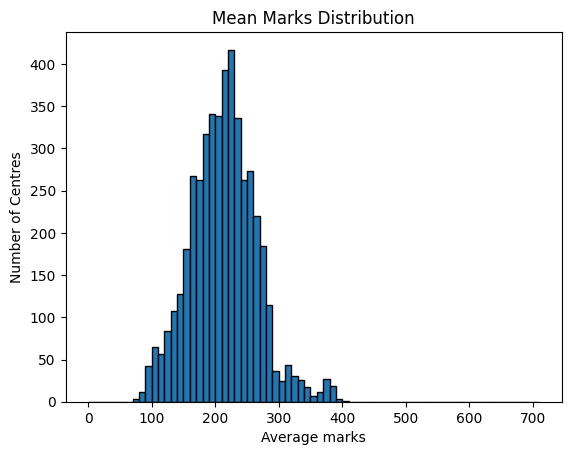

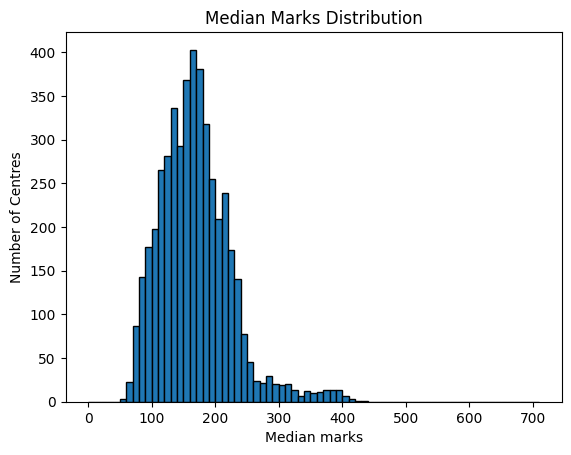

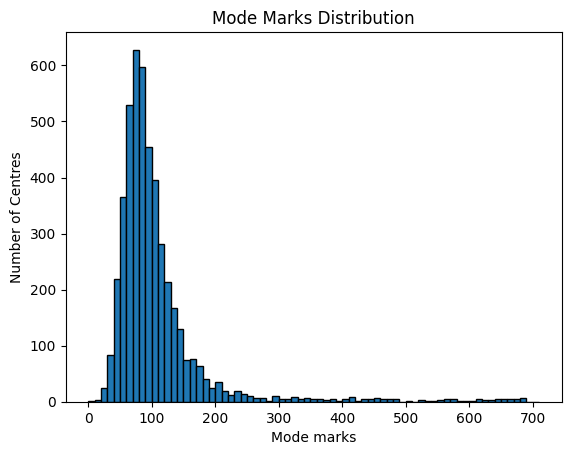

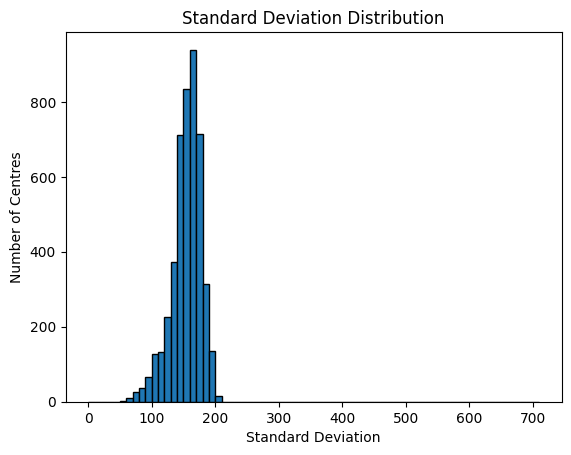

In [5]:
plot_hist(mean_vals, "Average marks", "Number of Centres", "Mean Marks Distribution")
plot_hist(median_vals, "Median marks", "Number of Centres", "Median Marks Distribution")
plot_hist(mode_vals, "Mode marks", "Number of Centres", "Mode Marks Distribution")
plot_hist(std_dev_vals, "Standard Deviation", "Number of Centres", "Standard Deviation Distribution")

In [12]:
def get_percentile(marks, percentile):
    return np.percentile(marks, percentile)

In [35]:
percentiles = [25, 50, 75, 90, 95, 99]
percentile_scores = [[], [], [], [], [], []]
for centre_code in centre_codes:
    marks = centre_wise_scores_[centre_code]
    for i, percentile in enumerate(percentiles):
        percentile_scores[i].append(get_percentile(marks, percentile))

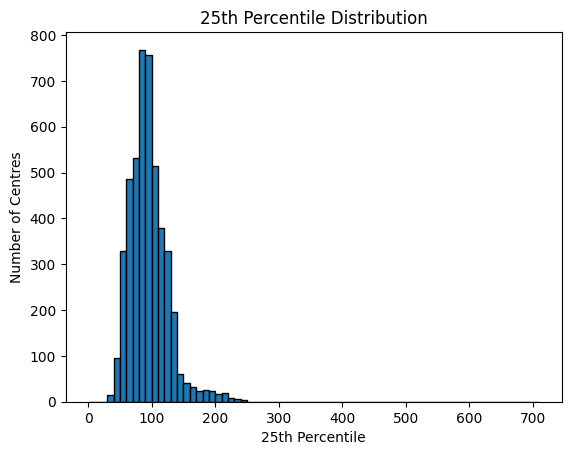

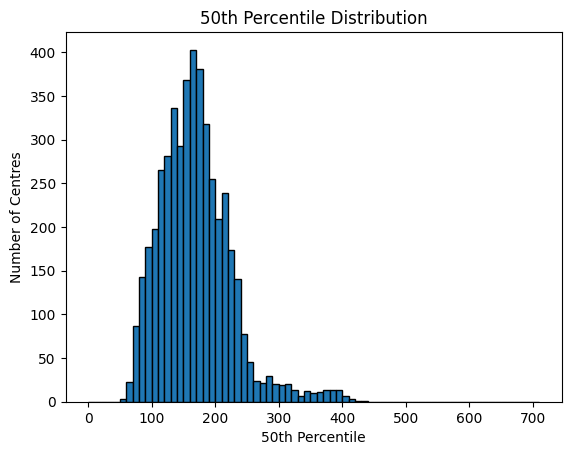

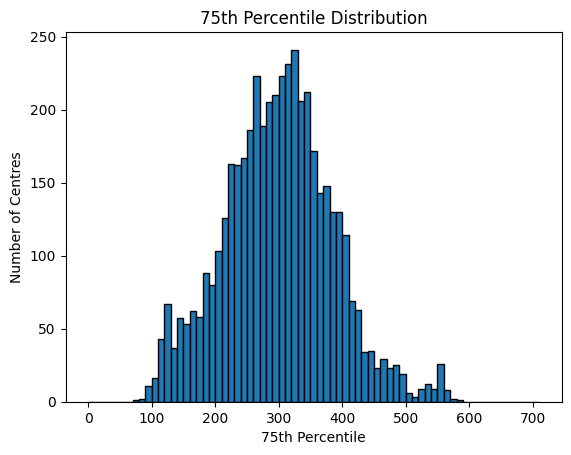

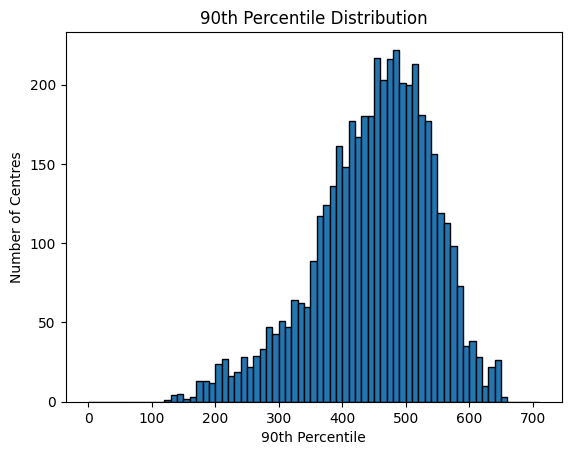

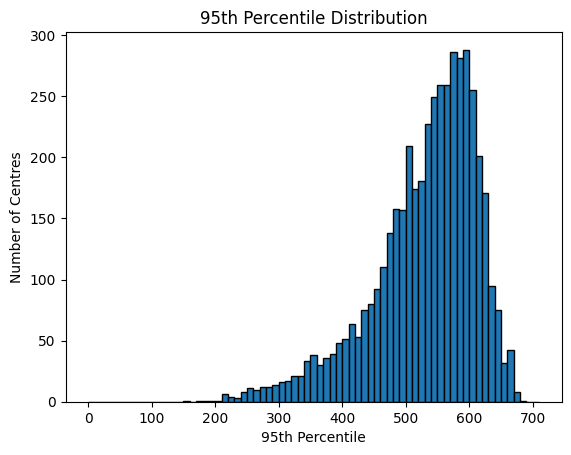

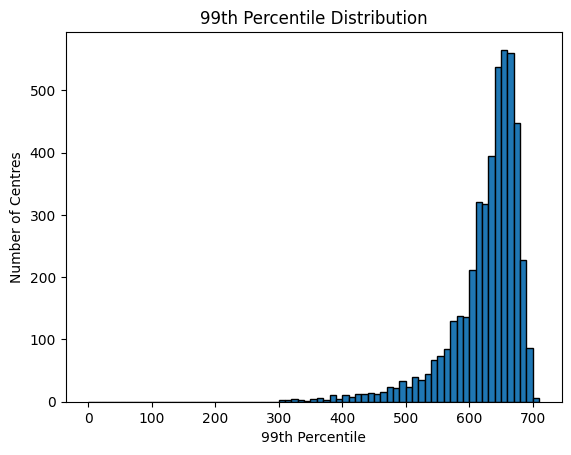

In [36]:
for i, percentile in enumerate(percentiles):
    plot_hist(percentile_scores[i], f"{percentile}th Percentile", "Number of Centres", f"{percentile}th Percentile Distribution")

In [66]:
def get_outliers(z_score):
    outliers = [[], [], [], [], [], []]
    for i, percentile_scores_ in enumerate(percentile_scores):
        mean = statistics.mean(percentile_scores_)
        std_dev = statistics.stdev(percentile_scores_)
        for percentile_score in percentile_scores_:
            if percentile_score > mean + z_score * std_dev:
                outliers[i].append((percentile_score, centre_codes[percentile_scores_.index(percentile_score)]))
    for i, outliers_ in enumerate(outliers):
        outliers[i] = sorted(outliers_, key=lambda x: x[0], reverse=True)
    return outliers

In [86]:
def get_outlier_cities(z_score):
    outliers_95 = get_outliers(z_score)[4]
    outlier_cities = {}
    for outlier in outliers_95:
        city_code = outlier[1][:4]
        city_details = city_codes[city_codes['City Code'] == int(city_code)].to_dict('records')[0]
        if city_code in outlier_cities:
            outlier_cities[city_code].append(outlier[1])
        else:
            outlier_cities[city_code] = [outlier[1]]

    print(f'{len(outlier_cities.keys())} oulier cities found')
    for city_code, outlier_centres in outlier_cities.items():
        city_details = city_codes[city_codes['City Code'] == int(city_code)].to_dict('records')[0]
        print(f'City: {city_details["City"]}, State: {city_details["State"]}, Outlier Centres: {len(outlier_centres)}')

In [95]:
get_outlier_cities(1.5)

14 oulier cities found
City: Sikar, State: Rajasthan, Outlier Centres: 37
City: Gurugram, State: Haryana, Outlier Centres: 1
City: Hissar, State: Haryana, Outlier Centres: 2
City: Mahendragarh, State: Haryana, Outlier Centres: 1
City: Kottayam, State: Kerala, Outlier Centres: 8
City: Rewari, State: Haryana, Outlier Centres: 1
City: Bhiwani, State: Haryana, Outlier Centres: 2
City: Namakkal, State: Tamil Nadu, Outlier Centres: 2
City: Kota, State: Rajasthan, Outlier Centres: 3
City: Jhunjhunu, State: Rajasthan, Outlier Centres: 1
City: Sirsa, State: Haryana, Outlier Centres: 1
City: Karnal, State: Haryana, Outlier Centres: 5
City: Churu, State: Rajasthan, Outlier Centres: 1
City: Rajkot, State: Gujarat, Outlier Centres: 1
